# Video Segmentation Data

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load the embedded video data

In [2]:
Z = np.load('data/videodata/video_color_Z_embedded_64.npy')

# the "Sax" movie is from time slices 0 to 5537
sax = Z[0:5537, :]

In [ ]:
# plot a 2-D representation of the video dynamics through time

from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, init='random', random_state=0, perplexity=50)
sax_tsne = tsne.fit_transform(sax)


plt.figure(figsize=(5, 5))
plt.plot(sax_tsne[:, 0], sax_tsne[:, 1])

In [ ]:
t = np.arange(np.shape(sax)[0], dtype='float') / 30.0
plt.figure(figsize=(8, 8))
plt.plot(sax_tsne[:, 0], sax_tsne[:, 1], color='k', alpha=0.1)
sc = plt.scatter(sax_tsne[:, 0], sax_tsne[:, 1], sax_tsne[:, 2], c=t, marker='.')

cbar = plt.colorbar(sc, fraction=0.046, pad=0.04)
cbar.set_label('Time (Seconds)')

plt.xticks([])
plt.yticks([])
plt.zticks([])
plt.show()
# plt.savefig('do')

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=20, covariance_type='full').fit(sax_tsne)

In [ ]:
import itertools
sns.set_context('poster')
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

color_iter = sns.color_palette('colorblind',20 )

def plot_results(X, Y_, means, covariances, index, title):
    plt.subplots(figsize=(5,5))
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#     plt.xlim(-9., 5.)
#     plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    
# Fit a Gaussian mixture with EM using five components
gmm = GaussianMixture(n_components=25, covariance_type='full').fit(sax_tsne)


plot_results(sax_tsne, gmm.predict(sax_tsne), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

In [ ]:
help(gmm)

In [ ]:
# Fit a Gaussian mixture with EM using five components
sns.set_context('poster')
gmm = GaussianMixture(n_components=8, covariance_type='full').fit(sax)

plot_results(sax_tsne, gmm.predict(sax), gmm.means_, gmm.covariances_, 0,
             'GMM Clustering')
plt.savefig('Clustered.png', dpi=300)

In [140]:
boundaries = gmm.predict(sax)[1:] != gmm.predict(sax)[:-1]
x = np.arange(1, len(boundaries) + 1) / 30.0
y = np.zeros(np.shape(x))
y[boundaries] = 1


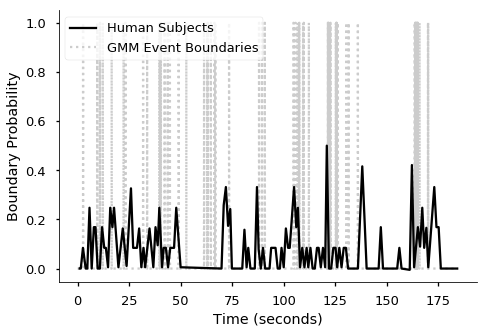

In [160]:
# # np.arange(np.shape(sax)[0], dtype='float') / 30.0
sns.set_context('talk')
plt.subplots(1, 1, figsize=(7.5, 5.0))
# plt.plot(np.arange(1, np.shape(sem.results.pe)[0]+1, dtype='float') / 30.0, zero_one_scale(sem.results.pe))

# young_warned_sax = pd.read_csv('data/zachs_2006_young_warned.csv', header=-1)
# young_warned_sax.set_index(0, inplace=True)
# plt.plot(young_warned_sax.index, young_warned_sax[1], 'r', alpha=0.5, label='Human Subjects (Young Warned)')

young_warned_sax = pd.read_csv('data/zachs_2006_young_unwarned.csv', header=-1)
young_warned_sax.set_index(0, inplace=True)
plt.plot(young_warned_sax.index, young_warned_sax[1], 'k', alpha=1.0, label='Human Subjects')

plt.plot(x, y, 'k:', alpha=0.2, label='GMM Event Boundaries')

plt.ylabel('Boundary Probability')
plt.xlabel('Time (seconds)')

plt.legend(loc='upper left',)
sns.despine()

plt.savefig('GMMvHuman.png', dpi=300)
